# Importing python libraries and the PySB model.

In [62]:
# Importing libraries
from jnk3_no_ask1 import model
import numpy as np
import matplotlib.pyplot as plt
from pysb.simulator import ScipyOdeSimulator
import pandas as pd

# Here we load the fitted parameters that we obtained using the Particle Swarm Optimization (PSO). To obtain this parameter set we used the two sets that Nicole gave us. The first set has the following proteins:
* Arrestin
* MKK4
* MKK7
* JNK3

# The second set of experiments has the following proteins:
* MKK4
* MKK7
* JNK3

# Using this experimental data we defined a cost function whose value is roughly the squared difference between the experimental data and the simulations. This gave us values for the kinetic parameters of the model

# Note: The model calibration was done assuming that all the reactions are diffusion limited. Which means that we set all the k_forward (k_on) to 1.5E4 inversed microM * s

In [147]:
# Loading fitted parameters
param_values = np.array([p.value for p in model.parameters])
idx_pars_calibrate = [3, 21, 23, 25, 27, 29, 32, 33, 34, 35, 36, 37,  39, 41]
rates_of_interest_mask = [i in idx_pars_calibrate for i, par in enumerate(model.parameters)]

fitted_pars = np.load('jnk3_noASK1_calibrated_pars7.npy')
# pydream_pars = np.load('jnk3_dreamzs_5chain_sampled_params_chain_1_9000.npy')
param_values[rates_of_interest_mask] = 10 ** fitted_pars
# param_values[rates_of_interest_mask] = 10 ** pydream_pars[-1]

In [148]:
param_values

array([2.00000000e+00, 4.60000000e+01, 2.00000000e+00, 1.67311089e+02,
       2.00000000e+00, 1.30000000e+01, 2.00000000e+00, 2.60000000e+01,
       2.00000000e+00, 2.80000000e+00, 2.00000000e+00, 8.40000000e+00,
       2.00000000e+00, 2.10000000e+01, 2.00000000e+00, 4.40000000e+02,
       1.40000000e-01, 1.72000000e+00, 2.00000000e+00, 2.80000000e+00,
       2.00000000e+00, 9.72800475e+01, 2.00000000e+00, 2.37126722e-01,
       2.00000000e+00, 9.95771188e+00, 2.00000000e+00, 1.35652516e-02,
       2.00000000e+00, 6.42696622e+02, 1.00000000e+01, 1.00000000e+01,
       7.14602826e+00, 1.02046256e+00, 5.75151736e-02, 4.72592219e+01,
       6.32194950e+00, 6.07602070e+02, 2.00000000e+00, 3.52349343e-02,
       2.00000000e+00, 6.91922186e-01, 2.00000000e+01, 2.00000000e-01,
       2.00000000e-01, 2.00000000e+00])

# Next, we present a plot of the results of the model calibration. The continuous lines represent the model simulations and the dots represent the experimental data.

<IPython.core.display.Javascript object>


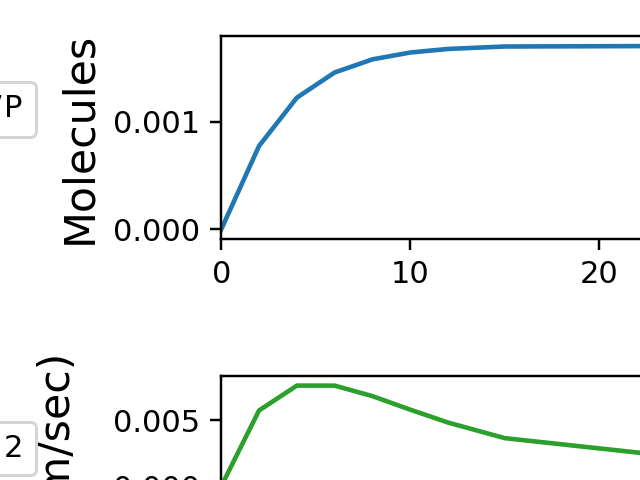

In [136]:
%matplotlib notebook
exp_data = pd.read_csv('../data/exp_data_arrestin_noarrestin.csv')

tspan0 = [0, 2, 4, 6, 8, 10, 12, 15, 30, 60]
solver0 = ScipyOdeSimulator(model, tspan=tspan0)
sim = solver0.run(param_values=param_values).all
arrestin_idx = [42]
plt.plot(exp_data['Time (secs)'].values[:-1], sim['pTyr_jnk3'], color='red')
plt.errorbar(exp_data['Time (secs)'].values[:-1], exp_data['pTyr_arrestin_avg'].values[:-1],
             exp_data['pTyr_arrestin_std'].values[:-1],
             linestyle='None', marker='o', capsize=5, color='red', label='pJNK3 by MKK4 exp')
plt.plot(exp_data['Time (secs)'].values[:-1], sim['pThr_jnk3'], color='blue')
plt.errorbar(exp_data['Time (secs)'].values[:-1], exp_data['pThr_arrestin_avg'].values[:-1],
             exp_data['pThr_arrestin_std'].values[:-1],
             linestyle='None', marker='o', capsize=5, color='blue', label='pJNK3 by MKK7 exp')

param_values2 = np.copy(param_values)
param_values2[arrestin_idx] = 0
sim2 = solver0.run(param_values=param_values2).all

plt.plot(exp_data['Time (secs)'].values[:-1], sim2['pTyr_jnk3'], color='black')
plt.errorbar(exp_data['Time (secs)'].values[:-1], exp_data['pTyr_noarrestin_avg'].values[:-1],
             exp_data['pTyr_noarrestin_std'].values[:-1],
             linestyle='None', marker='o', capsize=5, color='black', label='pJNK3 by MKK4 no Arr exp')
plt.plot(exp_data['Time (secs)'].values[:-1], sim2['pThr_jnk3'], color='green')
plt.errorbar(exp_data['Time (secs)'].values[:-1], exp_data['pThr_noarrestin_avg'].values[:-1],
             exp_data['pThr_noarrestin_std'].values[:-1],
             linestyle='None', marker='o', capsize=5, color='green', label='pJNK3 by MKK7 no Arr exp')

plt.xlabel('Arrestin (microM)')
plt.ylabel('pJNK3 (microM)')
plt.legend()

# From here, we are going to be doing the analysis using the simplest model that consists in having JNK3, MKK4, and MKK7 interacting. This would correspond to the last experimental data set that Nicole sent us. We used this model because it is easier to visualize its network of interactions and it still allows us to study the order of the JNK3 phosphorilation.

In [5]:
from cyjs_viz.model_visualization import ModelVisualization
from jnk3_no_ask1 import model
import numpy as np
tspan_v = np.linspace(0, 100, 100)
viz = ModelVisualization(model)
# data = viz.dynamic_view(tspan=tspan_v, param_values= param_values, maxplus=True)
data = viz.static_view(get_passengers=False, find_paths=['s0', 's25'])

In [6]:
from cyjs_viz.cytoscapejs import viewer as cyjs
from IPython.display import display
q=cyjs.render(data, layout_algorithm='preset')

<IPython.core.display.Javascript object>

In [7]:
import networkx as nx
from cyjs_viz.util import parse_name
for path in nx.all_simple_paths(viz.sp_graph, 's0', 's25', cutoff=10): 
    print ([parse_name(model.species[int(filter(str.isdigit, n))]) for n in path])

['Arrestin', 'Arrestin_MKK4P', 'Arrestin_JNK3UU_MKK4P', 'Arrestin_JNK3UP_MKK4P', 'JNK3UP', 'JNK3UP_MKK7P', 'JNK3PP_MKK7P', 'MKK7P', 'MKK4P', 'JNK3PU_MKK4P', 'JNK3PP_MKK4P']
['Arrestin', 'Arrestin_MKK4P', 'Arrestin_JNK3UU_MKK4P', 'Arrestin_JNK3UP_MKK4P', 'MKK4P', 'Arrestin_JNK3PU_MKK4P', 'JNK3PU', 'JNK3PU_MKK4P', 'JNK3PP_MKK4P']
['Arrestin', 'Arrestin_MKK4P', 'Arrestin_JNK3UU_MKK4P', 'Arrestin_JNK3UP_MKK4P', 'MKK4P', 'MKK7P', 'JNK3UU_MKK7P', 'JNK3PU_MKK7P', 'JNK3PU', 'JNK3PU_MKK4P', 'JNK3PP_MKK4P']
['Arrestin', 'Arrestin_MKK4P', 'Arrestin_JNK3UU_MKK4P', 'Arrestin_JNK3UP_MKK4P', 'MKK4P', 'MKK7P', 'Arrestin_JNK3UU_MKK7P', 'Arrestin_JNK3PU_MKK7P', 'JNK3PU', 'JNK3PU_MKK4P', 'JNK3PP_MKK4P']
['Arrestin', 'Arrestin_MKK4P', 'Arrestin_JNK3UU_MKK4P', 'Arrestin_JNK3UP_MKK4P', 'MKK4P', 'MKK7P', 'Arrestin_JNK3PU_MKK7P', 'JNK3PU', 'JNK3PU_MKK4P', 'JNK3PP_MKK4P']
['Arrestin', 'Arrestin_MKK4P', 'Arrestin_JNK3UU_MKK4P', 'Arrestin_JNK3UP_MKK4P', 'MKK4P', 'MKK7P', 'Arrestin_JNK3PU_MKK7P', 'Arrestin_JNK3PU

In [7]:
# Solving the PySB model to obtain the trajectories of the molecular species

tspan = [0, 2, 4, 6, 8, 10, 12, 15, 30, 60]
solver = ScipyOdeSimulator(model, tspan=tspan)
# param_values[arrestin_idx] = 0
sim = solver.run(param_values=param_values).all

In [8]:
from pysb.bng import generate_equations
generate_equations(model)
for i,j in enumerate(model.species): print i,j

0 Arrestin(b1=None, b2=None, b3=None)
1 MKK4(b=None, state='P')
2 MKK7(b=None, state='P')
3 JNK3(b=None, threo='U', tyro='U')
4 Arrestin(b1=None, b2=1, b3=None) % MKK4(b=1, state='P')
5 Arrestin(b1=None, b2=1, b3=None) % MKK7(b=1, state='P')
6 Arrestin(b1=None, b2=None, b3=1) % JNK3(b=1, threo='U', tyro='U')
7 JNK3(b=1, threo='U', tyro='U') % MKK4(b=1, state='P')
8 JNK3(b=1, threo='U', tyro='U') % MKK7(b=1, state='P')
9 Arrestin(b1=None, b2=1, b3=2) % JNK3(b=2, threo='U', tyro='U') % MKK4(b=1, state='P')
10 Arrestin(b1=None, b2=1, b3=2) % JNK3(b=2, threo='U', tyro='U') % MKK7(b=1, state='P')
11 JNK3(b=1, threo='U', tyro='P') % MKK4(b=1, state='P')
12 JNK3(b=1, threo='P', tyro='U') % MKK7(b=1, state='P')
13 Arrestin(b1=None, b2=1, b3=2) % JNK3(b=2, threo='U', tyro='P') % MKK4(b=1, state='P')
14 Arrestin(b1=None, b2=1, b3=2) % JNK3(b=2, threo='P', tyro='U') % MKK7(b=1, state='P')
15 JNK3(b=None, threo='U', tyro='P')
16 JNK3(b=None, threo='P', tyro='U')
17 Arrestin(b1=None, b2=1, b3=2) % 

# Figure 2. In this figure we can see how pMKK4 and pMKK7 are being used. pMKK4 and pMKK7 gets rapidly consumed and stay bound to other complexes.

Text(0,0.5,u'Concentration (microM)')

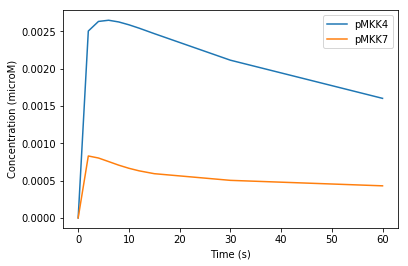

In [26]:
%matplotlib inline
plt.plot(tspan, sim['__s13'], label='pMKK4')
plt.plot(tspan, sim['__s14'], label='pMKK7')

# plt.semilogx(tspan, sim['__s3'], label='uuJNK3')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Concentration (microM)')

Text(0,0.5,u'Concentration (microM)')

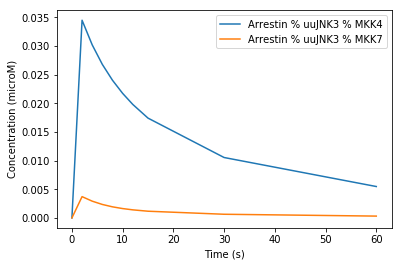

In [28]:
%matplotlib inline
plt.plot(tspan, sim['__s9'], label='Arrestin % uuJNK3 % MKK4')
plt.plot(tspan, sim['__s10'],label='Arrestin % uuJNK3 % MKK7')
# plt.plot(tspan[:12], sim['__s6'][:12], label='upJNK3 % MKK4')
# plt.plot(tspan, sim['__s7'], label='puJNK3 % MKK7')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Concentration (microM)')

Text(0,0.5,u'Concentration (microM)')

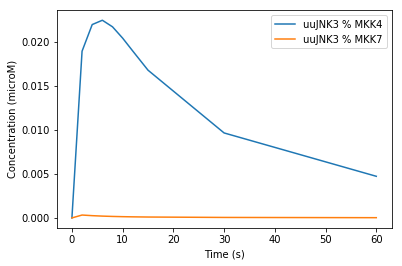

In [35]:
%matplotlib inline
plt.plot(tspan[:12], sim['__s7'][:12], label='uuJNK3 % MKK4')
plt.plot(tspan[:12], sim['__s8'][:12], label='uuJNK3 % MKK7')
# plt.plot(tspan[:12], sim['__s6'][:12], label='upJNK3 % MKK4')
# plt.plot(tspan, sim['__s7'], label='puJNK3 % MKK7')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Concentration (microM)')

Text(0,0.5,u'Concentration (microM)')

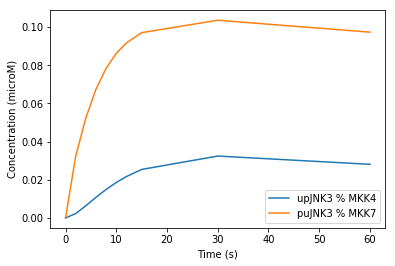

In [36]:
plt.plot(tspan[:], sim['__s11'][:], label='upJNK3 % MKK4')
plt.plot(tspan[:], sim['__s12'][:], label='puJNK3 % MKK7')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Concentration (microM)')

# Figure 5. Comparation of the formation and dissociation rates of the puJNK3%MKK7 complex.

In [ ]:
plt.plot(tspan[:12], sim['__s1'][:12]*sim['__s8'][:12]*param_values[36]
         -sim['__s6'][:12]*param_values[37], label='rate puJNK3%MKK7 dissociation')
plt.plot(tspan[:12], sim['__s4'][:12]*param_values[31], label='rate puJNK3%MKK7 formation')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Rate microM/s')

# Figure 6. Comparation of the formation and dissociation rates of the upJNK3%MKK4 complex.

In [ ]:
plt.plot(tspan[:12], sim['__s0'][:12]*sim['__s7'][:12]*param_values[34]-sim['__s5'][:12]*param_values[35], label='rate puJNK3%MKK4 dissociation')
plt.plot(tspan[:12], sim['__s3'][:12]*param_values[30], label='rate puJNK3%MKK4 formation')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Rate microM/s')

# Figure 7. In this figure we see that puJNK3 gets dissociated and accumulated from the puJNK3%MKK7 complex faster than the upJNK3%MKK4 complex. This implies that MKK7 phosphorylates JNK3 before MKK4 does.

Text(0,0.5,u'Concentration (microM)')

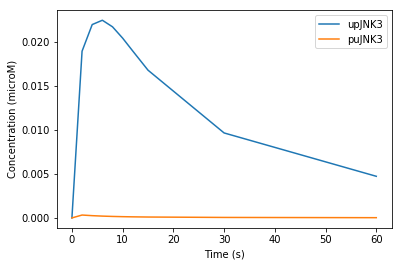

In [14]:
plt.plot(tspan[:12], sim['__s7'][:12], label='upJNK3')
plt.plot(tspan[:12], sim['__s8'][:12], label='puJNK3')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Concentration (microM)')

Text(0,0.5,u'Concentration (microM)')

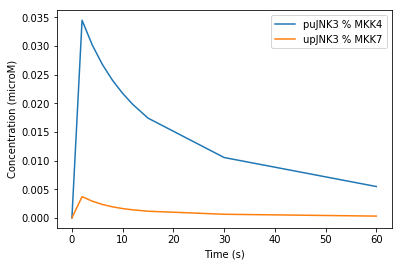

In [15]:
plt.plot(tspan[:12], sim['__s9'][:12], label='puJNK3 % MKK4')
plt.plot(tspan[:12], sim['__s10'][:12], label='upJNK3 % MKK7')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Concentration (microM)')

Text(0,0.5,u'Concentration (microM)')

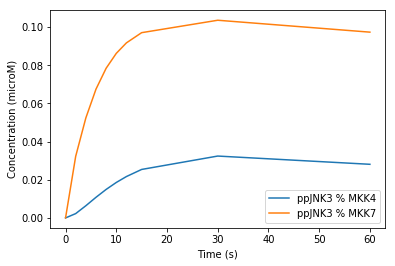

In [16]:
plt.plot(tspan[:12], sim['__s11'][:12], label='ppJNK3 % MKK4')
plt.plot(tspan[:12], sim['__s12'][:12], label='ppJNK3 % MKK7')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Concentration (microM)')

In [137]:
from tropical.dynamic_signatures_range import run_tropical

tspan = [0, 2, 4, 6, 8, 10, 12, 15, 30, 60]
solver_t = ScipyOdeSimulator(model, tspan=tspan)
# param_values[36] = 0
sim_t = solver_t.run(param_values=param_values)


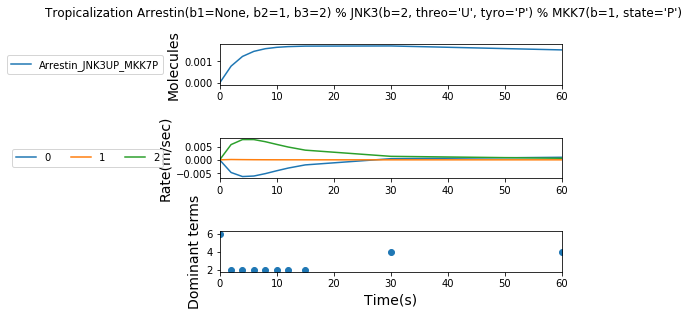

In [157]:
%matplotlib inline
signatures7 = run_tropical(model, simulations=sim_t, diff_par=1, sp_to_vis=[18], plot_type=0)

In [162]:
print(signatures7['species_combinations'][18]['products'])
# # print(signatures7[27][0])
print(model.species[19])
print(model.species[15])
print(model.species[5])
# print(model.odes[19])

OrderedDict([(1, {0: (__s15*__s5*kf_upJNK3Arr_MKK4 - __s18*kr_upJNK3Arr_MKK4,), 1: (__s13*__s2*keq_pMKK4_to_pMKK7,), 2: (-__s18*kr_MKK7BindArr_JNK3 + __s19*__s2*kf_MKK7BindArr_JNK3,)}), (2, {3: (__s13*__s2*keq_pMKK4_to_pMKK7, __s15*__s5*kf_upJNK3Arr_MKK4 - __s18*kr_upJNK3Arr_MKK4), 4: (-__s18*kr_MKK7BindArr_JNK3 + __s19*__s2*kf_MKK7BindArr_JNK3, __s15*__s5*kf_upJNK3Arr_MKK4 - __s18*kr_upJNK3Arr_MKK4), 5: (__s13*__s2*keq_pMKK4_to_pMKK7, -__s18*kr_MKK7BindArr_JNK3 + __s19*__s2*kf_MKK7BindArr_JNK3)}), (3, {6: (__s13*__s2*keq_pMKK4_to_pMKK7, -__s18*kr_MKK7BindArr_JNK3 + __s19*__s2*kf_MKK7BindArr_JNK3, __s15*__s5*kf_upJNK3Arr_MKK4 - __s18*kr_upJNK3Arr_MKK4)})])
Arrestin(b1=None, b2=None, b3=1) % JNK3(b=1, threo='U', tyro='P')
JNK3(b=None, threo='U', tyro='P')
Arrestin(b1=None, b2=1, b3=None) % MKK7(b=1, state='P')


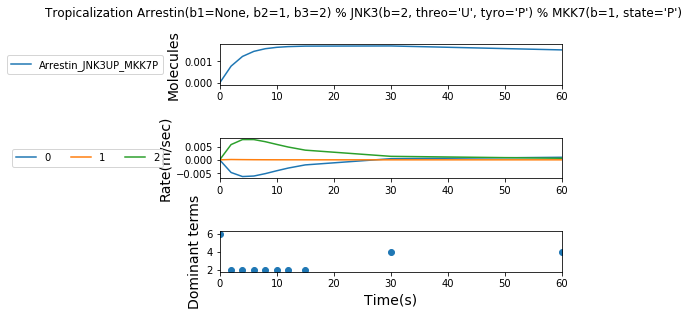

In [155]:
signatures7 = run_tropical(model, simulations=sim_t, diff_par=1, sp_to_vis=[13], plot_type=0)

In [33]:
print(signatures7['species_combinations'][13]['products'])
print(signatures7[9])

OrderedDict([(1, {0: (__s9*kcat_pMKK4_ArrJNK3,), 1: (-(__s13*kr_upJNK3Arr_MKK4 - __s15*__s4*kf_upJNK3Arr_MKK4),), 2: (-(-__s1*__s19*kf_MKK4BindArr_JNK3 + __s13*kr_MKK4BindArr_JNK3),)}), (2, {3: (__s9*kcat_pMKK4_ArrJNK3, -(__s13*kr_upJNK3Arr_MKK4 - __s15*__s4*kf_upJNK3Arr_MKK4)), 4: (__s9*kcat_pMKK4_ArrJNK3, -(-__s1*__s19*kf_MKK4BindArr_JNK3 + __s13*kr_MKK4BindArr_JNK3)), 5: (-(__s13*kr_upJNK3Arr_MKK4 - __s15*__s4*kf_upJNK3Arr_MKK4), -(-__s1*__s19*kf_MKK4BindArr_JNK3 + __s13*kr_MKK4BindArr_JNK3))}), (3, {6: (__s9*kcat_pMKK4_ArrJNK3, -(__s13*kr_upJNK3Arr_MKK4 - __s15*__s4*kf_upJNK3Arr_MKK4), -(-__s1*__s19*kf_MKK4BindArr_JNK3 + __s13*kr_MKK4BindArr_JNK3))})])
[array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([6, 4, 4, 4, 4, 4, 4, 4, 4, 4])]


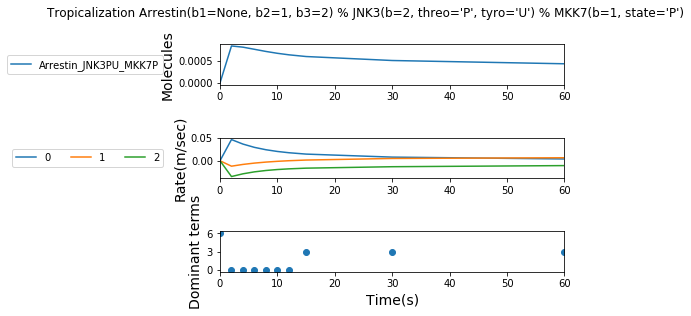

In [34]:
signatures8 = run_tropical(model, simulations=sim_t, diff_par=1, sp_to_vis=[14], plot_type=0)

# Conclusions
* From the simulation analysis we can imply the order in JNK3 activation is that MKK7 first phosphorylates JNK3 at Thr and then MKK4 phosphorylates JNK3 at Tyr. Also, there is a small portion of the activated JNK3 where the order is reversed.
* Something that it is interesting and that I think would require more analysis or experiments is that when MKK4 binds inactive JNK3 it has a high k_reverse (~3 orders of magnitude difference), but when JNK3 is phosphorylated at one of the sites that k_reverse becomes very small. And, the opposite situation happens to MKK7.
